In [2]:
#HW 6  WeatherPy
    #Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 
    #Utilize a simple Python library, the OpenWeatherMap API, 
    #and a little common sense to create a representative model of weather across world cities.

In [3]:
#Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import scipy #mandatory dependency in seaborn module, per seaborn documentation
import numpy as np
import pandas as pd
import requests as req
import json
import citipy # I had to enter in the Gitbash consule "pip install citipy", then return to the jupyter notebook.
from citipy import citipy #Needed this extra line of code in order for citipy to work

In [4]:
#The apikeys module wasn't able to be installed for some reason. 
#I tried 'pip install apikeys' in my basic command prompt console within my PythonData environment but came across error:
    #Could not find a version that satisifes the requirement apikeys (from versions: ) No matching distribution found for apikeys
#So I tried another module called 'config' that I found from this website: http://www.blacktechdiva.com/hide-api-keys/
import config

In [5]:
# METHOD 1: randomly select 600 cities using Citipy

# Randomly select latitude across the full range of latitude (-90 to 90)
lat_sample = np.random.randint(-90,90,600)
# Randomly select longtiude across the full range of longitude (-180 to 180)
lon_sample = np.random.randint(-90,90,600)
# Zip together to create a list of tuples
latlon_sample = list(zip(lat_sample, lon_sample))

In [6]:
# ALTERNATIVE METHOD 2: At first, I didn't realize the instructions said to use Citipy. 
    # OpenWeatherAPI documentation referenced a list of cities here http://bulk.openweathermap.org/sample/  
    # I downloaded the city.list.json zip file and saved in the same directory.

#json_path = os.path.join('city.list.json')
#with open(json_path, 'r', encoding="utf8") as json_file:
#    cities_json = json.load(json_file)

#From looking at the first dictionary in the json list I see that 'name' holds the name of the city
#print(cities_json[0])

#Use a for loop to extract a random sample of city names 
#random_sample = np.random.randint(0,len(cities_json),600)
#cities_sample = []
#for x in random_sample:
#    city_name = cities_json[x]['name']
#    cities_sample.append(city_name)

In [7]:
# Identify the city closest to each of the lat long pairs
citynames = []

for pair in latlon_sample:
    city = citipy.nearest_city(pair[0], pair[1])
    citynames.append(city.city_name)

In [8]:
key = config.api_key
url = "http://api.openweathermap.org/data/2.5/weather"
params = {'appid': key,'q': '', 'units': 'metric'}

#Perform a weather check on each of the cities using a series of successive API calls.
    #Include a print log of each city as it's being processed with the city number, city name, and requested URL.
    #Temperature(F), Humidity(%), Cloudiness(%), Wind Speed(mph)

weather_data=[]
countnum = 0

for city in citynames:
    params['q'] = city
    response = req.get(url,params=params).json()
    weather_data.append(response)
    countnum = countnum +1
    print('Processing Record ' + str(countnum) + ' | ' + city + ' | url: api.openweathermap.org/data/2.5/weather?q=' + city)

Processing Record 1 | mahebourg | url: api.openweathermap.org/data/2.5/weather?q=mahebourg
Processing Record 2 | tumannyy | url: api.openweathermap.org/data/2.5/weather?q=tumannyy
Processing Record 3 | ushuaia | url: api.openweathermap.org/data/2.5/weather?q=ushuaia
Processing Record 4 | mastic beach | url: api.openweathermap.org/data/2.5/weather?q=mastic beach
Processing Record 5 | torbay | url: api.openweathermap.org/data/2.5/weather?q=torbay
Processing Record 6 | feijo | url: api.openweathermap.org/data/2.5/weather?q=feijo
Processing Record 7 | ushuaia | url: api.openweathermap.org/data/2.5/weather?q=ushuaia
Processing Record 8 | amalapuram | url: api.openweathermap.org/data/2.5/weather?q=amalapuram
Processing Record 9 | bredasdorp | url: api.openweathermap.org/data/2.5/weather?q=bredasdorp
Processing Record 10 | east london | url: api.openweathermap.org/data/2.5/weather?q=east london
Processing Record 11 | owosso | url: api.openweathermap.org/data/2.5/weather?q=owosso
Processing Re

Processing Record 91 | santa isabel do rio negro | url: api.openweathermap.org/data/2.5/weather?q=santa isabel do rio negro
Processing Record 92 | hermanus | url: api.openweathermap.org/data/2.5/weather?q=hermanus
Processing Record 93 | grand river south east | url: api.openweathermap.org/data/2.5/weather?q=grand river south east
Processing Record 94 | cape town | url: api.openweathermap.org/data/2.5/weather?q=cape town
Processing Record 95 | luau | url: api.openweathermap.org/data/2.5/weather?q=luau
Processing Record 96 | hermanus | url: api.openweathermap.org/data/2.5/weather?q=hermanus
Processing Record 97 | mahebourg | url: api.openweathermap.org/data/2.5/weather?q=mahebourg
Processing Record 98 | tsihombe | url: api.openweathermap.org/data/2.5/weather?q=tsihombe
Processing Record 99 | castro | url: api.openweathermap.org/data/2.5/weather?q=castro
Processing Record 100 | jujuy | url: api.openweathermap.org/data/2.5/weather?q=jujuy
Processing Record 101 | cape town | url: api.openwe

Processing Record 179 | goderich | url: api.openweathermap.org/data/2.5/weather?q=goderich
Processing Record 180 | lukulu | url: api.openweathermap.org/data/2.5/weather?q=lukulu
Processing Record 181 | dingle | url: api.openweathermap.org/data/2.5/weather?q=dingle
Processing Record 182 | barawe | url: api.openweathermap.org/data/2.5/weather?q=barawe
Processing Record 183 | dharur | url: api.openweathermap.org/data/2.5/weather?q=dharur
Processing Record 184 | boa vista | url: api.openweathermap.org/data/2.5/weather?q=boa vista
Processing Record 185 | sorvag | url: api.openweathermap.org/data/2.5/weather?q=sorvag
Processing Record 186 | punta arenas | url: api.openweathermap.org/data/2.5/weather?q=punta arenas
Processing Record 187 | carnarvon | url: api.openweathermap.org/data/2.5/weather?q=carnarvon
Processing Record 188 | klaksvik | url: api.openweathermap.org/data/2.5/weather?q=klaksvik
Processing Record 189 | ushuaia | url: api.openweathermap.org/data/2.5/weather?q=ushuaia
Processin

Processing Record 267 | tobane | url: api.openweathermap.org/data/2.5/weather?q=tobane
Processing Record 268 | bam | url: api.openweathermap.org/data/2.5/weather?q=bam
Processing Record 269 | port elizabeth | url: api.openweathermap.org/data/2.5/weather?q=port elizabeth
Processing Record 270 | bredasdorp | url: api.openweathermap.org/data/2.5/weather?q=bredasdorp
Processing Record 271 | mar del plata | url: api.openweathermap.org/data/2.5/weather?q=mar del plata
Processing Record 272 | qaanaaq | url: api.openweathermap.org/data/2.5/weather?q=qaanaaq
Processing Record 273 | iquitos | url: api.openweathermap.org/data/2.5/weather?q=iquitos
Processing Record 274 | iqaluit | url: api.openweathermap.org/data/2.5/weather?q=iqaluit
Processing Record 275 | adrar | url: api.openweathermap.org/data/2.5/weather?q=adrar
Processing Record 276 | kruisfontein | url: api.openweathermap.org/data/2.5/weather?q=kruisfontein
Processing Record 277 | hambantota | url: api.openweathermap.org/data/2.5/weather?

Processing Record 356 | kazalinsk | url: api.openweathermap.org/data/2.5/weather?q=kazalinsk
Processing Record 357 | kigali | url: api.openweathermap.org/data/2.5/weather?q=kigali
Processing Record 358 | dikson | url: api.openweathermap.org/data/2.5/weather?q=dikson
Processing Record 359 | hermanus | url: api.openweathermap.org/data/2.5/weather?q=hermanus
Processing Record 360 | mungaa | url: api.openweathermap.org/data/2.5/weather?q=mungaa
Processing Record 361 | surgut | url: api.openweathermap.org/data/2.5/weather?q=surgut
Processing Record 362 | dikson | url: api.openweathermap.org/data/2.5/weather?q=dikson
Processing Record 363 | bertinoro | url: api.openweathermap.org/data/2.5/weather?q=bertinoro
Processing Record 364 | tasiilaq | url: api.openweathermap.org/data/2.5/weather?q=tasiilaq
Processing Record 365 | ushuaia | url: api.openweathermap.org/data/2.5/weather?q=ushuaia
Processing Record 366 | georgetown | url: api.openweathermap.org/data/2.5/weather?q=georgetown
Processing Re

Processing Record 446 | mittweida | url: api.openweathermap.org/data/2.5/weather?q=mittweida
Processing Record 447 | marawi | url: api.openweathermap.org/data/2.5/weather?q=marawi
Processing Record 448 | jamestown | url: api.openweathermap.org/data/2.5/weather?q=jamestown
Processing Record 449 | port alfred | url: api.openweathermap.org/data/2.5/weather?q=port alfred
Processing Record 450 | carauari | url: api.openweathermap.org/data/2.5/weather?q=carauari
Processing Record 451 | lagoa | url: api.openweathermap.org/data/2.5/weather?q=lagoa
Processing Record 452 | urdzhar | url: api.openweathermap.org/data/2.5/weather?q=urdzhar
Processing Record 453 | benghazi | url: api.openweathermap.org/data/2.5/weather?q=benghazi
Processing Record 454 | dingle | url: api.openweathermap.org/data/2.5/weather?q=dingle
Processing Record 455 | valdivia | url: api.openweathermap.org/data/2.5/weather?q=valdivia
Processing Record 456 | puerto leguizamo | url: api.openweathermap.org/data/2.5/weather?q=puerto

Processing Record 534 | portsmouth | url: api.openweathermap.org/data/2.5/weather?q=portsmouth
Processing Record 535 | klaksvik | url: api.openweathermap.org/data/2.5/weather?q=klaksvik
Processing Record 536 | lagoa | url: api.openweathermap.org/data/2.5/weather?q=lagoa
Processing Record 537 | lagoa | url: api.openweathermap.org/data/2.5/weather?q=lagoa
Processing Record 538 | taolanaro | url: api.openweathermap.org/data/2.5/weather?q=taolanaro
Processing Record 539 | tsihombe | url: api.openweathermap.org/data/2.5/weather?q=tsihombe
Processing Record 540 | marcona | url: api.openweathermap.org/data/2.5/weather?q=marcona
Processing Record 541 | saint george | url: api.openweathermap.org/data/2.5/weather?q=saint george
Processing Record 542 | taolanaro | url: api.openweathermap.org/data/2.5/weather?q=taolanaro
Processing Record 543 | mayor pablo lagerenza | url: api.openweathermap.org/data/2.5/weather?q=mayor pablo lagerenza
Processing Record 544 | campbellton | url: api.openweathermap.

In [9]:
# Create lists of latitudes and temperatures
lat_data = []
lon_data =[]
temp_data = []
humidity_data = []
wind_data = []
cloudiness_data = []
city_data = []
country_data = []
date_data = []

# I learned that not all the cities identified by the citipy modules is identifiable by OpenWeather.
# In which case, the results from OpenWeather contains a key that called 'message' with the value = 'city not found'.
# 'message' is a key that doesn't appear in the dictionary for a city that is identified by OpenWeather.
# Hence, in the for loop below, I inserted an if statement to append data only when the 'message' is not in the city's dictionary keys.

for data in weather_data:
    if 'message' not in data.keys(): 
        date_data.append(data['dt'])
        city_data.append(data['name'])
        country_data.append(data['sys']['country'])
        lat_data.append(data['coord']['lat'])
        lon_data.append(data['coord']['lon'])
        temp_data.append(data['main']['temp'])
        humidity_data.append(data['main']['humidity'])
        wind_data.append(data['wind']['speed'])
        cloudiness_data.append(data['clouds']['all'])

# Shortcut:
# lat_data = [data['coord']['lat'] for data in weather_data]
# temp_data = [data['main']['temp'] for data in weather_data]

weather_dict = {'Date': date_data,
                'City': city_data,
                'Country': country_data,
                'Latitude': lat_data,
                'Longitude': lon_data,
                'Cloudiness': cloudiness_data,
                'Max Temp': temp_data,                 
                'Humidity': humidity_data,
                'Wind Speed': wind_data,
                }
weather_data_df = pd.DataFrame(weather_dict)
weather_data_df = weather_data_df[['Date','City','Country','Latitude','Longitude','Cloudiness',
                                   'Max Temp', 'Humidity', 'Wind Speed']]

In [10]:
weather_data_df.head()

,Date,City,Country,Latitude,Longitude,Cloudiness,Max Temp,Humidity,Wind Speed
0,1512363600,Mahebourg,MU,-20.41,57.70,40,29.00,62,7.20
1,1512367236,Ushuaia,AR,-54.80,-68.30,76,8.46,85,5.90
2,1512366960,Mastic Beach,US,40.77,-72.85,1,2.60,100,2.57
3,1512363600,Torbay,CA,47.67,-52.73,90,0.00,100,5.70
4,1512367335,Feijo,BR,-8.16,-70.35,12,25.11,92,1.40


In [11]:
print(len(weather_data_df))

511


In [12]:
#Of the 600 cities identified by citipy, only 511 were identified by OpenWeather

In [13]:
#For ease of interpretability, convert the Date into a recognizable format
import time
formatted_date = []

for date in weather_data_df['Date']:
    formatted_date.append(time.ctime(date))   
weather_data_df['Date'] = formatted_date
weather_data_df.head()

,Date,City,Country,Latitude,Longitude,Cloudiness,Max Temp,Humidity,Wind Speed
0,Sun Dec 3 21:00:00 2017,Mahebourg,MU,-20.41,57.70,40,29.00,62,7.20
1,Sun Dec 3 22:00:36 2017,Ushuaia,AR,-54.80,-68.30,76,8.46,85,5.90
2,Sun Dec 3 21:56:00 2017,Mastic Beach,US,40.77,-72.85,1,2.60,100,2.57
3,Sun Dec 3 21:00:00 2017,Torbay,CA,47.67,-52.73,90,0.00,100,5.70
4,Sun Dec 3 22:02:15 2017,Feijo,BR,-8.16,-70.35,12,25.11,92,1.40


In [14]:
#Save a CSV of all data retrieved
weather_data_df.to_csv('Weather_Data_DF3.csv',sep=',')

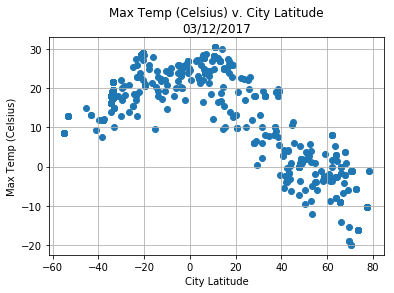

In [15]:
# Scatterplot: Temperature v. Latitude
plt.scatter(weather_data_df["Latitude"], weather_data_df["Max Temp"], marker="o")
plt.title("Max Temp (Celsius) v. City Latitude" + '\n' + time.strftime("%d/%m/%Y"))
plt.ylabel("Max Temp (Celsius)")
plt.xlabel("City Latitude")
plt.grid(True)
plt.savefig('Temp v City Latitude.png') #I discovered that if I put plt.show before the plt.savefig, the image will be blank.
plt.show()

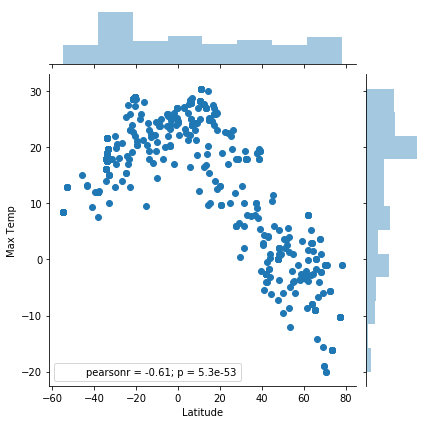

In [16]:
#For fun, I used seaborn to plot the distribution of each x and y variable.
sns.jointplot(x="Latitude", y="Max Temp", data=weather_data_df)
plt.savefig('Temp v City Latitude_sns.png')
plt.show()

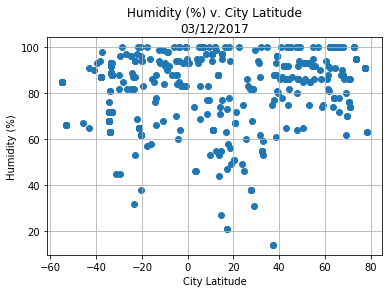

In [19]:
# Scatterplot: Humidity(%) v. Latitude
plt.scatter(weather_data_df["Latitude"], weather_data_df["Humidity"], marker="o")
plt.title("Humidity (%) v. City Latitude" + '\n' + time.strftime("%d/%m/%Y"))
plt.ylabel("Humidity (%)")
plt.xlabel("City Latitude")
plt.grid(True)
plt.savefig('Humidity v City Latitude.png')
plt.show()

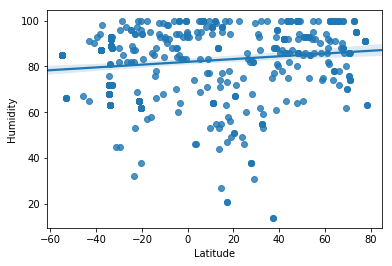

In [20]:
#For fun, I used seaborn to plot a regression line
f, ax = plt.subplots(figsize=(6, 4))
sns.regplot(x="Latitude", y="Humidity", data=weather_data_df, ax=ax);
plt.savefig('Humidity v City Latitude_sns.png')
plt.show()

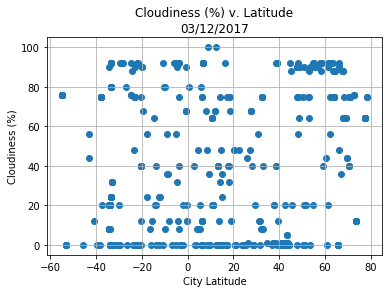

In [21]:
# Scatterplot: Cloudiness(%) v. Latitude
plt.scatter(weather_data_df["Latitude"], weather_data_df["Cloudiness"], marker="o")
plt.title("Cloudiness (%) v. Latitude" + '\n' + time.strftime("%d/%m/%Y"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.grid(True)
plt.show()
plt.savefig('Cloudiness v City Latitude.png')

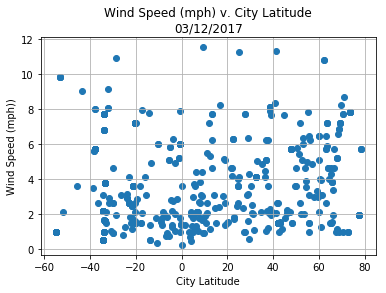

In [30]:
# Scatterplot: Wind Speed(mph) v. Latitude
plt.scatter(weather_data_df["Latitude"], weather_data_df["Wind Speed"], marker="o")
plt.title("Wind Speed (mph) v. City Latitude" + '\n' + time.strftime("%d/%m/%Y"))
plt.ylabel("Wind Speed (mph))")
plt.xlabel("City Latitude")
plt.grid(True)
plt.savefig('Wind Speed v City Latitude.png')
plt.show()

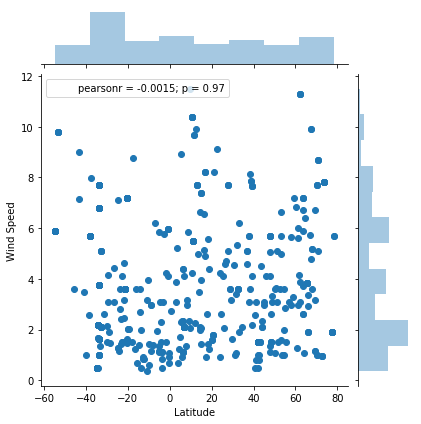

In [22]:
sns.jointplot(x="Latitude", y="Wind Speed", data=weather_data_df)
plt.savefig('Wind Speed v City Latitude_sns.png')
plt.show()

In [23]:
# In looking at the full list of 517 cities in the csv, there are a lot of duplicate ciites.
# I think this is becuase I generated 600 random pair of whole nubmers with a range between -90 and 90.
# I think this would be mitigated if I generated lat lon with at least 4 significant figures so there's more variation
# in the nearest_city generated by citipy.

#Observation #1: The temperature trend seems to reverse near the equator (latitude = 0).
#As the latitude approaches the equator from the north or south, temperature increases.
#I believe that if we were run this analysis six months from now, the graph would be reversed 
#since I know that the northern (positive latitude) and southern (negative latitude) hemispheres have opposite seasons.

#Observation #2:  There doesn't seem to be clear linear relationship between latitude and humidity.  
#We are able to tell from the scatterplot that there are are way more cities with humidity >80 than cities <80.

#Observation #3: There doesn't seem to be a clearn linear relationship between latitude and wind speed or cloudiness.
#Although based on the distribution of dots, there seems to be an equal spread of cloudiness across all cities
#and an unequal spread of windspeed across cities.  Most cities have windspeed <4 mph. This can also be seen by the 
#distribution plot of the y variable.